# The purpose of this project is to use different techniques on the wine dataset and predict the quality of wine. Many different models and parameters have been used to determine the best label value with most accuracy.

## tool used for data preprocessing: pandas (scaling and standardization of dataset have been used)

## tool used for visualization: matplotlib (Correlation Matrix and Boxplot have been used), Clustering Analysis on feature Data

## model used for prediction: Logistic Regression, Support Vector Machine, Random Forest, K Nearest Neighbor, Neural Network using Keras

## tools used for data validation: confusion_matrix, precision_score, recall_score,f1_score, K Fold Cross Validation, Hyperparameter tuning

## Extra Work: Feature Importance Analysis



## Mounting Data on Google Drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 abalone.data
 bpRNA_CRW_2852.ct
 bpRNA_CRW_2852_predicted.ct
 bpRNA_CRW_2852.st
 breast-cancer.data
 car.data
 car.dot
 car_model.dot
 car.png
 checkmodel.h5
'Copied Homeworks'/
'Copy of Nov16_ML_Practicum_clustering_for_class.ipynb'
 DeepLearningImageTutorial.ipynb
'ecoli .data'
 exam.xlsx
'Face Mask Project'/
'Final Exam Part III.ipynb'
 Final_Exam_Part_III_ver2.ipynb
 homework01.ipynb
 homework02.ipynb
 homework03.ipynb
 homework05.ipynb
 homework06.ipynb
 homework07_01.ipynb
 iris_tree.dot
 iris_tree.png
 Keras_practise.ipynb
'ML Challenge 1.ipynb'
'ML Challenge II .ipynb'
'ML Challenge IV .ipynb'
 model_lr0.001.h5
 model_lr0.01.h5
 model_lr0.1.h5
'Natural Language Processing'/
 NewProj.ipynb
 Nov16_ML_Practicum_clustering_for_class.ipynb
'Object Detection Homework'/
 Perceptron_practise.ipynb
'Practise 1.ipynb'
'Practise 2.ipynb'
 Protein_Project.ipynb
 SPECT_model.h5
 SPECT.test
 SPECT.train
 transfusion.data
 tree.dot
 tree.png
 weather.c

# Loading Data

In [4]:
import pandas as pd

In [5]:
wine_df = pd.read_csv('winequality-white.csv',sep=";")

In [6]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data Inspection

**1.Data Type Inspection**

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**2.Checking Missing Values in Dataframe**

In [8]:
wine_df[(wine_df.isna().any(axis=1))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [9]:
wine_df.isnull().values.any()

False

In [10]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**3.Show Statistics for each column**

In [11]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Visualization

**1.Checking correlation between variables**

In [102]:
def visualize_correlation(df_pd):
  # input: a pandas dataframe
  import matplotlib.pyplot as plt
  f = plt.figure(figsize=(15, 10))
  plt.matshow(df_pd.corr(), fignum=f.number)
  plt.xticks(range(df_pd.shape[1]), df_pd.columns, fontsize=14, rotation=45)
  plt.yticks(range(df_pd.shape[1]), df_pd.columns, fontsize=14)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=14)

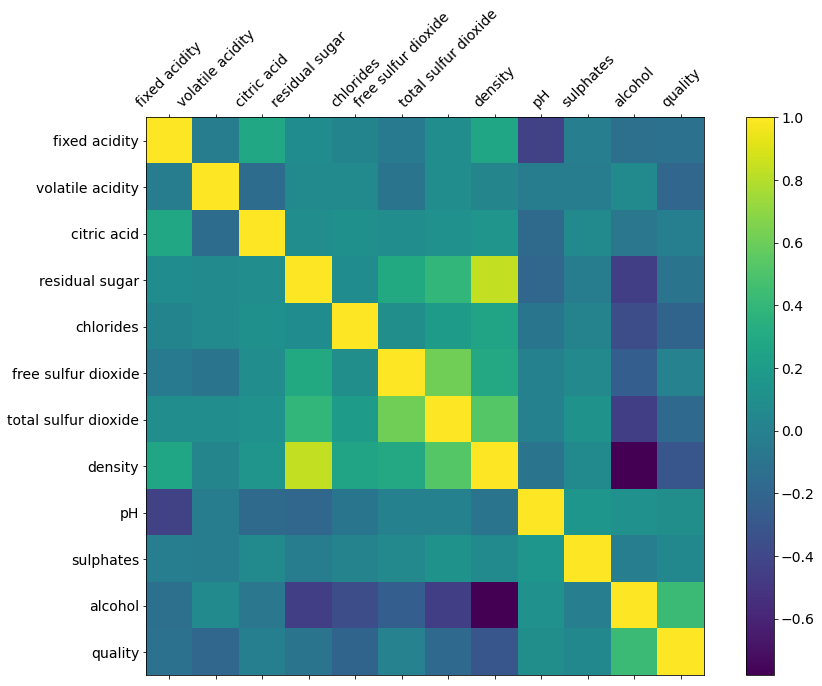

In [103]:
visualize_correlation(wine_df)

**Observation on the Correlation Matrix:**
From the corelation Matrix we can see correlation between different features. We can see that there is a positive correlation between density and residual sugar which means higher higer residual sugar is tends to have higher density in the wine.

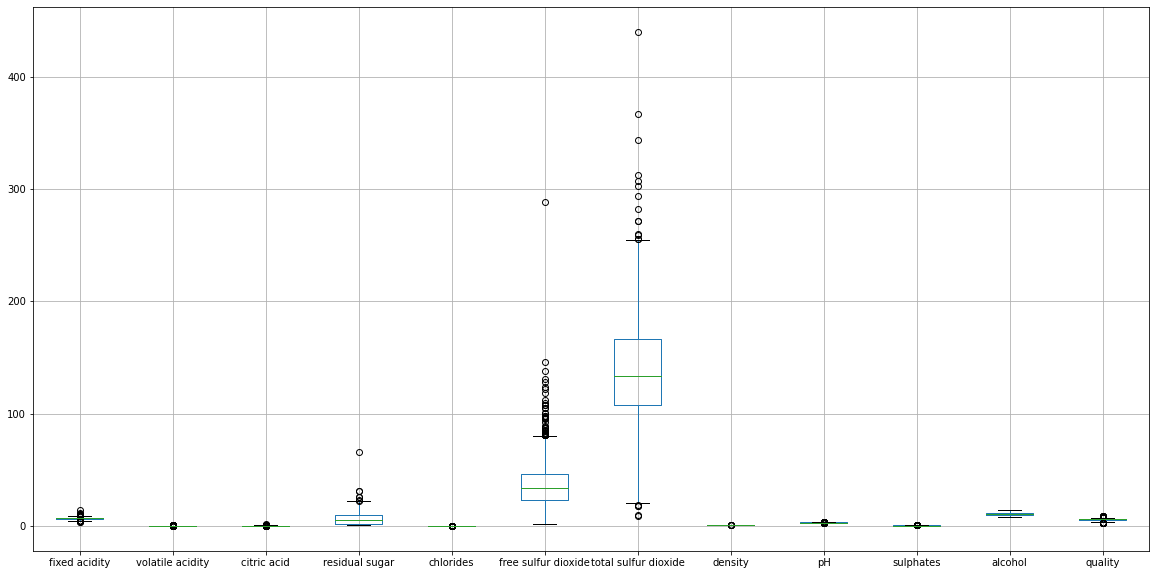

In [107]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20, 10))
wine_df.boxplot()

**Observation on the Boxplot:**
By viewing the boxplot we can see that most of the features have comparatively short boxplot, which means that most of the features have values in similar range, exceptional are the free sulfur dioxide and total sulfur dioxide. So to remove this disparity between the features, feature scaling is very important as it will put the values in the same range or same scale so that no feature is dominated by the other. Feature Scaling before feeding the data into any ML model is crucial to improve the model's performance.

In [118]:
wine_df['quality'].values

array([6, 6, 6, ..., 6, 7, 6])

Text(0, 0.5, 'Number of Samples')

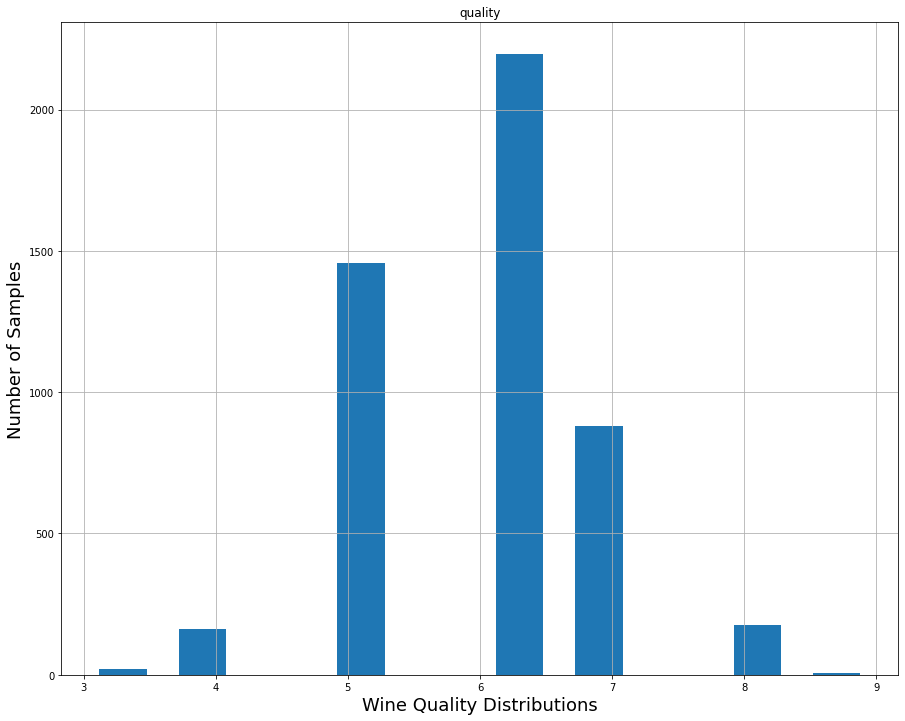

In [114]:
fig = plt.figure(figsize = (15,12))
ax = fig.gca()
wine_df.hist(column='quality',ax = ax,rwidth=0.6)
plt.xlabel('Wine Quality Distributions',fontsize=18)
plt.ylabel('Number of Samples',fontsize=18)

**Observation on the Histogram:**
The quality of the wine is given between a score of 0 and 10. From the histogram we can see that the distribution of score 5,6 and 7 are much higher among the samples than other scores, which is a classic sign of imbalanced data. The number of data points belonging to the minority classes  is far smaller than the number of the data points belonging to the majority classes which will affect the model's performance on test dataset as model will not be able to generalize well on unseen data and will result in overfitting. Oversampling can be used to balance dataset by increasing the size of rare samples. And after oversampling k-fold cross validation should be done as by resampling the data repeatedly randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.

## Splitting the Dataset

In [16]:
features = wine_df.drop(['quality'],axis=1)

In [17]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [18]:
labels = wine_df[['quality']]

In [19]:
labels

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [20]:
from sklearn.model_selection import train_test_split
wine_train, wine_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
print("Training set (70%) is: ",len(wine_train))
print("Test set(30%) is: ",len(wine_test))

Training set (70%) is:  3428
Test set(30%) is:  1470


## Perform Feature Scaling - Standardization on the dataset

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
wine_data_train_scaled= scaler.fit_transform(wine_train)
wine_data_test_scaled= scaler.fit(wine_test)

In [24]:
wine_data_train_scaled

array([[-0.31132265, -0.28780076, -0.27645327, ..., -1.13031916,
         0.0940735 , -1.14685943],
       [ 1.10470658, -0.18935432,  1.30066456, ..., -1.06354794,
        -1.49278025,  0.64257527],
       [-0.66532995, -0.48469365, -0.02743466, ...,  0.87281754,
        -0.61119484,  0.56123733],
       ...,
       [ 0.86870171, -0.09090788,  1.54968316, ..., -1.13031916,
         0.35854912,  0.72391321],
       [-0.66532995, -0.3862472 , -0.35945947, ..., -0.12875081,
        -0.963829  ,  0.07320968],
       [ 1.45871389, -0.09090788,  0.13857774, ...,  0.2051053 ,
         1.24013454, -0.0894662 ]])

In [25]:
wine_df_scaled = pd.DataFrame(wine_data_train_scaled)

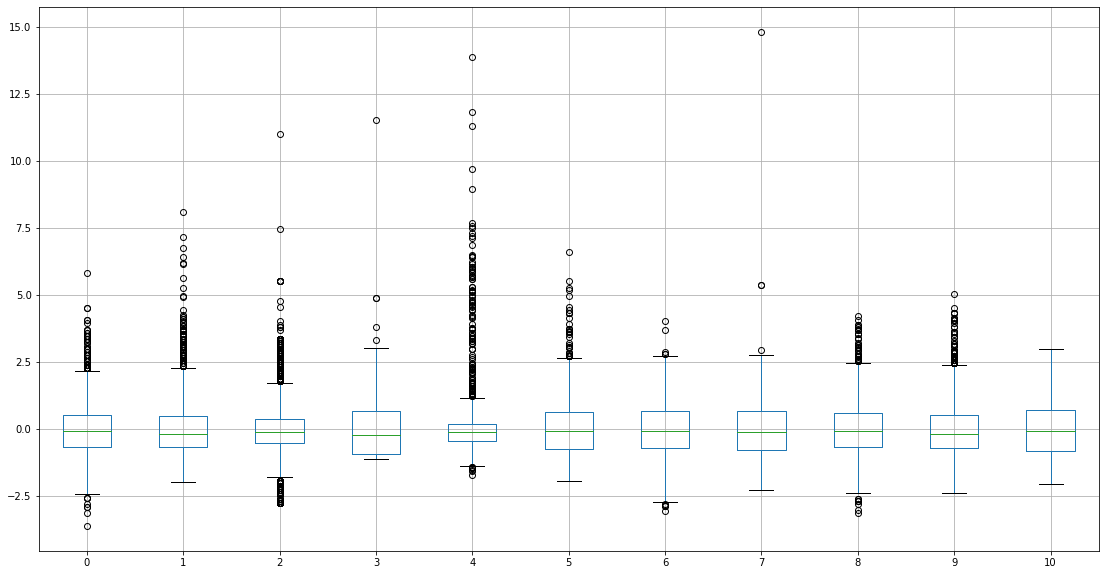

In [26]:
f = plt.figure(figsize=(19, 10))
wine_df_scaled.boxplot()

## Applying clustering analysis on the feature data

**(1) Apply Kmeans clustering, and use PCA to visualize the points in a 2D plot.**

In [27]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10, n_init=5, n_jobs=8)

In [28]:
kmeans_model.fit(wine_data_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=5, n_jobs=8, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
test_cluster_labels  = kmeans_model.predict(wine_data_train_scaled)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wine_data_train_scaled)
pca_data = pca.transform(wine_data_train_scaled)

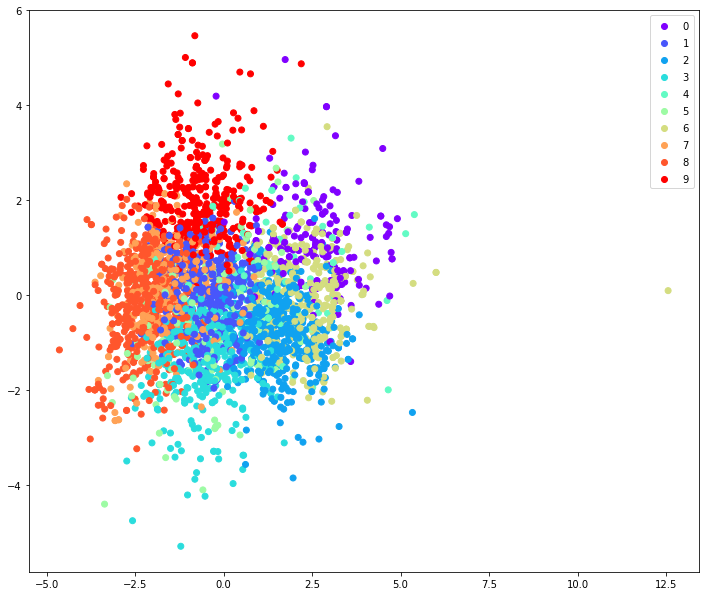

In [31]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(bottom = 0.1)
scatter= plt.scatter(pca_data[:, 0], pca_data[:, 1], c= test_cluster_labels, cmap='rainbow') 
legend = plt.legend(*scatter.legend_elements(),
                    loc="upper right")
plt.show()



**(2) Visualize data using dimension reduction method-TSNE in the 2D plot**

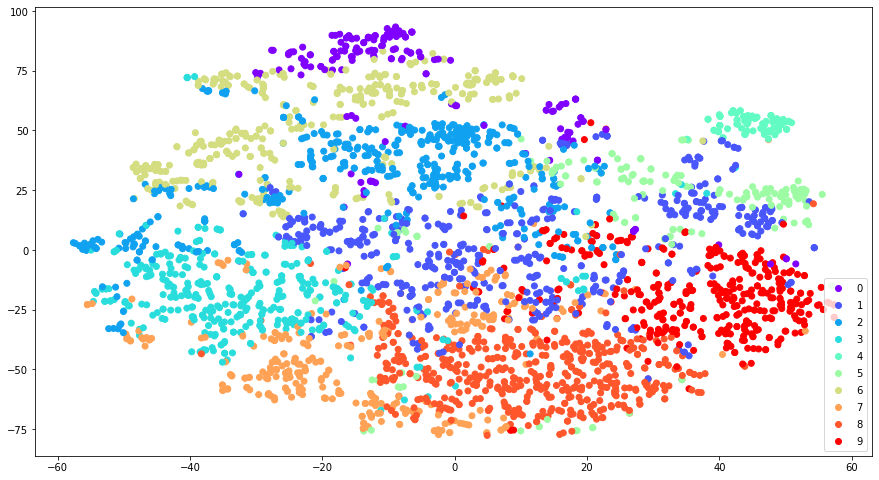

In [32]:
from sklearn.manifold import TSNE
TSNE_model = TSNE(learning_rate=100)
transformed = TSNE_model.fit_transform(wine_data_train_scaled)

# For visualization, we need to apply TSNE for feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.subplots_adjust(bottom = 0.1)
scatter=plt.scatter(transformed[:, 0], transformed[:, 1], c= test_cluster_labels, cmap='rainbow') 
legend = plt.legend(*scatter.legend_elements(),
                    loc="lower right")
plt.show()

In [35]:
y_train_new=y_train['quality'].to_list()

In [41]:
import numpy as np
y_train_updated=np.array(y_train_new)

**(3)Visualize data using hierarchical clustering**

In [39]:
def sample_data(X_train,y_train,y_train_updated,samples_per_group=5):
  small_set_feature = []
  small_set_labels = []
  for label in np.unique(y_train):
    X_sub = X_train[y_train.flatten()==label]
    y_sub = y_train[y_train.flatten()==label]
    rand_id = np.random.choice(range(len(X_sub)),size=samples_per_group)
    data = X_sub[rand_id]
    labels = y_sub[rand_id]
    small_set_feature.append(data)
    small_set_labels.append(labels)
  small_set_feature = np.concatenate(small_set_feature,axis=0)
  small_set_labels = np.concatenate(small_set_labels,axis=0).flatten()
  return small_set_feature,small_set_labels



In [43]:
y_train=y_train.values

In [45]:
# Pay attention to the variable names for training features and training labels
small_set_feature,small_set_labels = sample_data(wine_data_train_scaled,y_train,y_train_updated,samples_per_group=8)
print(small_set_feature.shape)
print(small_set_labels.shape)

(56, 11)
(56,)


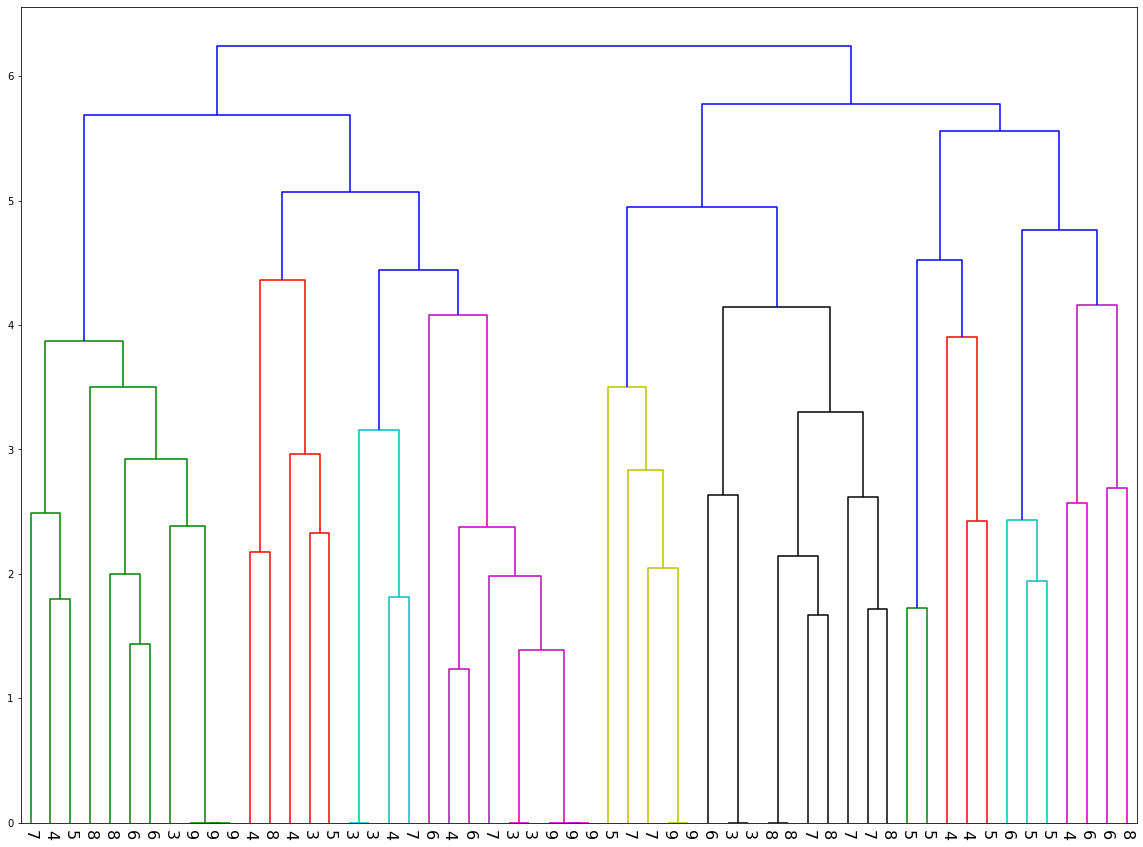

In [47]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
fig = plt.figure(figsize=(20,15))
from scipy import stats
# normalize by each sample before applying hierarchical clustering (we used relu in feature generation, so the feature magnitude is different)
data_featureVector_s = stats.zscore(small_set_feature, axis=1, ddof=1)
mergings = linkage(data_featureVector_s, method = 'complete')
dendrogram(mergings, labels = small_set_labels, leaf_rotation=-90, leaf_font_size=16)
plt.show()

##Create a binary classification dataset by cutting the quality labels into two categories (<6, >=6)

In [48]:
# Separate out the features and targets
import numpy as np
features = wine_df.drop(columns='quality')
targets = pd.DataFrame(wine_df['quality'])
targets[targets<6] = 0
targets[targets>=6] = 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

##Classification models

**(1) Logistic regression**

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'l2', C = 1, random_state = 0)
logistic_model.fit(X_train,y_train)
logistic_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

**(2) Support Vector Machine**

In [50]:
from sklearn.svm import SVC
svm_model = SVC(C = 10, gamma = 0.1)
svm_model.fit(X_train,y_train)
svm_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

**(3) Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train,y_train)
random_forest_model.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

**(4) K Nearest-neighbors**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
knn_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

**(5) Neural Network using keras**

In [53]:
def neuralnet_classifier(optimizer="adam", dropout=0.1, init='uniform', nbr_features=11, nbr_neurons=30, nbr_layers = 1):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    model = Sequential()
    model.add(Dense(nbr_neurons, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
    model.add(Dropout(dropout), )
    for i in range(nbr_layers-1):
      model.add(Dense(nbr_neurons, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
      model.add(Dropout(dropout), )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

nn_model = neuralnet_classifier()
nn_model.fit(X_train,y_train)
nn_model.predict(X_test)

108/108 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6987


array([[0.6530836 ],
       [0.83214533],
       [0.84673905],
       ...,
       [0.5749912 ],
       [0.7844222 ],
       [0.8254727 ]], dtype=float32)

## Evaluation Metrics

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
# Make predictions and evalute
logistic_pred = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_pred )
logistic_prec = precision_score(y_test, logistic_pred )
logistic_recall = recall_score(y_test, logistic_pred )
logistic_roc = roc_auc_score(y_test, logistic_pred )
logistic_f1 = f1_score(y_test, logistic_pred )


In [55]:
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred )
svm_prec = precision_score(y_test, svm_pred )
svm_recall = recall_score(y_test, svm_pred )
svm_roc = roc_auc_score(y_test, svm_pred )
svm_f1 = f1_score(y_test, svm_pred )


In [56]:
random_pred = random_forest_model.predict(X_test)
random_acc = accuracy_score(y_test, random_pred )
random_prec = precision_score(y_test, random_pred )
random_recall = recall_score(y_test, random_pred )
random_roc = roc_auc_score(y_test, random_pred )
random_f1 = f1_score(y_test, random_pred )


In [57]:
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred )
knn_prec = precision_score(y_test, knn_pred )
knn_recall = recall_score(y_test, knn_pred )
knn_roc = roc_auc_score(y_test, knn_pred )
knn_f1 = f1_score(y_test, knn_pred )

In [76]:
import sklearn
nn_prob = nn_model.predict(X_test)
nn_classes = nn_model.predict_classes(X_test)
nn_prob = nn_prob[:, 0]
nn_classes = nn_classes[:, 0]
nn_acc = accuracy_score(y_test,nn_classes)
nn_prec = precision_score(y_test,nn_classes)
nn_recall = recall_score(y_test,nn_classes)
nn_f1 = f1_score(y_test,nn_classes)
nn_roc = roc_auc_score(y_test,nn_prob)

**Performance Comparison of the models**

In [77]:
evaluation_data = {'Methods':  ['Logistic Regression', 'K-Nearest Neighbors','Support Vector Machine','Random Forest','Neural Network'],
                   'Accuracy': [logistic_acc, knn_acc,svm_acc,random_acc,nn_acc],
                   'Precision':[logistic_prec,knn_prec,svm_prec,random_prec,nn_prec],
                   'Recall':[logistic_recall,knn_recall,svm_recall,random_recall,nn_recall],
                   'F1 Score':[logistic_f1,knn_f1,svm_f1,random_f1,nn_f1],
                   'AUC Score':[logistic_roc,knn_roc,svm_roc,random_roc,nn_roc]
         
                  }
evaluation_df = pd.DataFrame(evaluation_data, columns = ['Methods', 'Accuracy','Precision','Recall','F1 Score','AUC Score'])
evaluation_df

,Methods,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.755102,0.789809,0.870612,0.828244,0.691120
1,K-Nearest Neighbors,0.764626,0.827136,0.825476,0.826305,0.730920
2,Support Vector Machine,0.794558,0.841691,0.858576,0.850050,0.759098
3,Random Forest,0.830612,0.868110,0.884654,0.876304,0.800678
4,Neural Network,0.753061,0.797373,0.852558,0.824043,0.770625


## K-Fold Cross Validation and Hyper-Parameter tuning on the models

In [60]:
def classifier_parameter_search(model, hyperparameter_grid):
  from sklearn.model_selection import RandomizedSearchCV
  model_grid = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, cv = 10,scoring='accuracy', n_iter=500, n_jobs = 5)
  model_grid.fit(X_train, y_train)
  return model_grid.best_estimator_

**(1) Logistic regression**

In [61]:
hyperparameter_grid = {'C': [1,0.1,0.01,0.001,0.0001,0]}
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_best_cv_model = classifier_parameter_search(logistic_model, hyperparameter_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=500. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


**(2) Support Vector Machine**

In [62]:
hyperparameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}
from sklearn.svm import SVC
svm = SVC()
svm_best_cv_model = classifier_parameter_search(svm, hyperparameter_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=500. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


**(3) Random Forest**

In [64]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt']}
random_forest = RandomForestClassifier(random_state=60)
random_forest_best_cv_model = classifier_parameter_search(random_forest, hyperparameter_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


**(4) K Nearest-neighbors**

In [65]:
hyperparameter_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13,15]}
knn = KNeighborsClassifier()
knn_best_cv_model = classifier_parameter_search(knn, hyperparameter_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


**(5) Neural Network using keras**

In [66]:
def neuralnet_classifier(optimizer="adam", dropout=0.1, init='uniform', nbr_features=11, nbr_neurons=30, nbr_layers = 1):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    model = Sequential()
    model.add(Dense(nbr_neurons, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
    model.add(Dropout(dropout), )
    for i in range(nbr_layers-1):
      model.add(Dense(nbr_neurons, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
      model.add(Dropout(dropout), )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier
kears_estimator = KerasClassifier(build_fn=neuralnet_classifier, verbose=1)
hyperparameter_grid = {
    'epochs': [30],
    'nbr_neurons': [10, 20, 30, 50],
    'nbr_layers': [1, 2]
}
nn_best_cv_model = classifier_parameter_search(kears_estimator, hyperparameter_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
108/108 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.6966
Epoch 2/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7593
Epoch 3/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7669
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7675
Epoch 5/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7728
Epoch 6/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7774
Epoch 7/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7736
Epoch 8/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7748
Epoch 9/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7725
Epoch 10/30
108/108 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7768

## Performance Comparison on the best models gained by parameter tuning and cross validation

In [69]:
logistic_best_model_pred = logistic_best_cv_model.predict(X_test)
logistic_best_acc = accuracy_score(y_test, logistic_best_model_pred )
logistic_best_prec = precision_score(y_test, logistic_best_model_pred )
logistic_best_recall = recall_score(y_test, logistic_best_model_pred )
logistic_best_roc = roc_auc_score(y_test, logistic_best_model_pred )
logistic_best_f1 = f1_score(y_test, logistic_best_model_pred )

In [70]:
svm_best_model_pred = svm_best_cv_model.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_model_pred )
svm_best_prec = precision_score(y_test, svm_best_model_pred )
svm_best_recall = recall_score(y_test, svm_best_model_pred )
svm_best_roc = roc_auc_score(y_test, svm_best_model_pred )
svm_best_f1 = f1_score(y_test, svm_best_model_pred )

In [71]:
random_best_model_pred = random_forest_best_cv_model.predict(X_test)
random_best_acc = accuracy_score(y_test, random_best_model_pred )
random_best_prec = precision_score(y_test, random_best_model_pred )
random_best_recall = recall_score(y_test, random_best_model_pred )
random_best_roc = roc_auc_score(y_test, random_best_model_pred )
random_best_f1 = f1_score(y_test, random_best_model_pred )

In [72]:
knn_best_model_pred = knn_best_cv_model.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_model_pred )
knn_best_prec = precision_score(y_test, knn_best_model_pred )
knn_best_recall = recall_score(y_test, knn_best_model_pred )
knn_best_roc = roc_auc_score(y_test, knn_best_model_pred )
knn_best_f1 = f1_score(y_test, knn_best_model_pred )

In [87]:
nn_best_pred = nn_best_cv_model.predict(X_test)
nn_best_acc = accuracy_score(y_test,nn_best_pred)
nn_best_prec = precision_score(y_test,nn_best_pred)
nn_best_recall = recall_score(y_test,nn_best_pred)
nn_best_f1 = f1_score(y_test,nn_best_pred)
nn_best_roc = roc_auc_score(y_test,nn_best_pred)

46/46 [==============================] - 0s 703us/step


**Performance Comparison before and after tuning**

In [90]:
updated_evaluation_data = {'Methods':  ['Logistic Regression', 'K-Nearest Neighbors','Support Vector Machine','Random Forest','Neural Network'],
                   'Accuracy': [logistic_best_acc, knn_best_acc,svm_best_acc,random_best_acc,nn_best_acc],
                   'Precision':[logistic_best_prec,knn_best_prec,svm_best_prec,random_best_prec,nn_best_prec],
                   'Recall':[logistic_best_recall,knn_best_recall,svm_best_recall,random_best_recall,nn_best_recall],
                   'F1 Score':[logistic_best_f1,knn_best_f1,svm_best_f1,random_best_f1,nn_best_f1],
                   'AUC Score':[logistic_best_roc,knn_best_roc,svm_best_roc,random_best_roc,nn_best_roc]
         
                  }
updated_evaluation_df = pd.DataFrame(updated_evaluation_data, columns = ['Methods', 'Accuracy','Precision','Recall','F1 Score','AUC Score'])
updated_evaluation_df

,Methods,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.750340,0.785844,0.868606,0.825155,0.684831
1,K-Nearest Neighbors,0.776190,0.847193,0.817452,0.832057,0.753335
2,Support Vector Machine,0.792517,0.820370,0.888666,0.853154,0.739259
3,Random Forest,0.832653,0.867058,0.889669,0.878218,0.801071
4,Neural Network,0.787075,0.827586,0.866600,0.846644,0.743025


In [92]:
evaluation_df

,Methods,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.755102,0.789809,0.870612,0.828244,0.691120
1,K-Nearest Neighbors,0.764626,0.827136,0.825476,0.826305,0.730920
2,Support Vector Machine,0.794558,0.841691,0.858576,0.850050,0.759098
3,Random Forest,0.830612,0.868110,0.884654,0.876304,0.800678
4,Neural Network,0.753061,0.797373,0.852558,0.824043,0.770625


## Feature importance analysis

**(1) Using random forest  to get importance score for features**

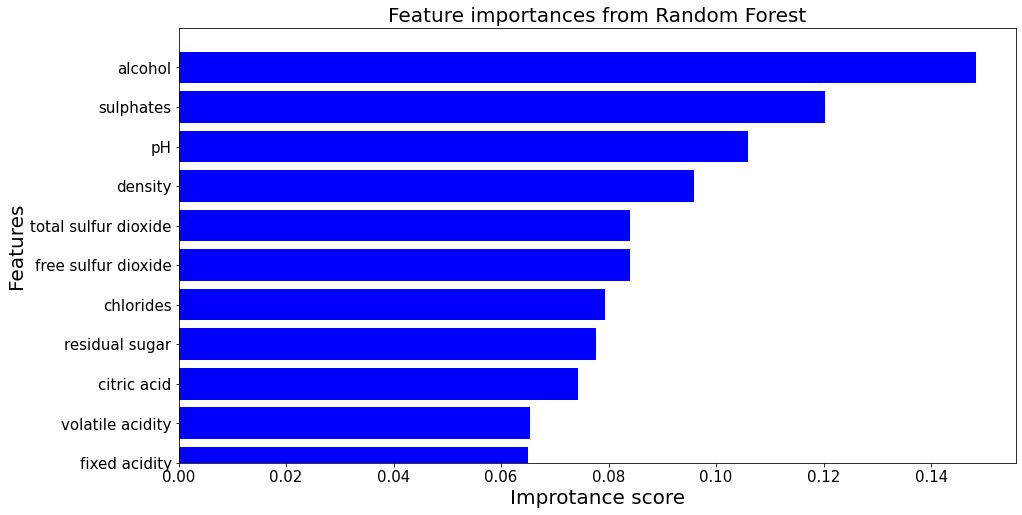

In [94]:
random_forest = RandomForestClassifier(random_state=60)
random_forest.fit(X_train,y_train)
random_forest_importance = random_forest.feature_importances_
indices = np.argsort(random_forest_importance)
plt.figure(figsize=(15,8))
plt.title("Feature importances from Random Forest",fontsize=20)
plt.barh(range(X_train.shape[1]), random_forest_importance[indices],
       color="b",  align="center")
plt.yticks(range(X_train.shape[1]), wine_df.columns[0:-1],fontsize= 15)
plt.ylim([0,X_train.shape[1]])
plt.xticks(fontsize= 15 )
plt.xlabel('Improtance score', fontsize = 20); 
plt.ylabel('Features', fontsize = 20); 
plt.show()

**(2) Using support vector machine to get importance score for features**

[ 0.0227833  -0.63191085 -0.05715968  0.56836204  0.00517346  0.16045264
 -0.08683948 -0.29637819  0.17789507  0.16081799  0.86325359]


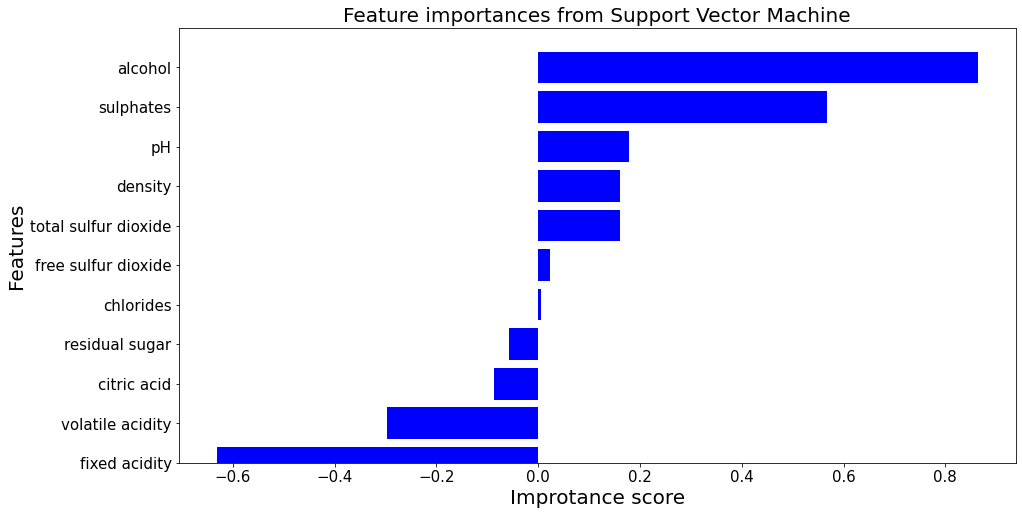

In [96]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
svm_importance = svm.coef_[0]
print(svm_importance)
indices = np.argsort(svm_importance)
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances from Support Vector Machine",fontsize=20)
plt.barh(range(X_train.shape[1]), svm_importance[indices],
       color="b",  align="center")
plt.yticks(range(X_train.shape[1]), wine_df.columns[0:-1],fontsize= 15)
plt.ylim([0,X_train.shape[1]])
plt.xticks(fontsize= 15 )
plt.xlabel('Improtance score', fontsize = 20); 
plt.ylabel('Features', fontsize = 20); 
plt.show()